In [2]:
#importing the modules
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

print("modules successfully loaded!")

modules successfully loaded!


In [3]:
#let's load our dataset
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


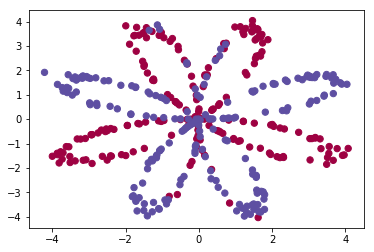

In [4]:
#after taking in the dataset let us see what the dataset looks like
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


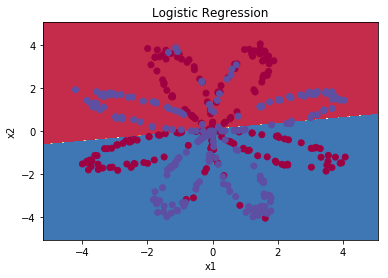

In [5]:
#now let's see how the logistic regression would have performed on this dataset.
classifier = sklearn.linear_model.LogisticRegressionCV(cv = 3)
classifier.fit(X.T, Y.ravel().T)
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: classifier.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = classifier.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [6]:
#logistic regression is giving only 47% accuracy. One of the primary reasons is that the data is not linearly separable.
#It also gives us an intuition for the non-linearity of the problem.
#Let us start building our neural network model with one hidden layer.

To build a neural network with one hidden layer. We got to work in some steps.
1. Define the network architecture: no. of layers, no. of units, etc.
2. Initialize the parameters of the neural network
3. Do the forward propagation with the current parameters to calculate the current cost
4. Do the backward propagation to calculate the errors
5. Optimize the parameters using gradient descent
6. Predict the results with the learned parameters.

In [33]:
#let's start with the definition of the network architecture

def define_layer_sizes(X, Y):
    
    '''
    input = X, Y
    output = (n_x, n_h, n_y) 
    '''
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [78]:
#let's initialize the parameters of the network.

def initialize_parameters(n_x, n_h, n_y):
    
    '''
    Input = (n_x, n_h, n_y)
    
    Output:
        W1 : matrix of shape (n_h, n_x)
        b1 : vector of shape (n_h, 1)
        W2 : matrix of shape (n_y, n_h)
        b2 : vector of shape (n_y, 1)
        
        contained in a dictionary
    '''
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1" : W1,
        "b1" : b1, 
        "W2" : W2,
        "b2" : b2
    }
    
    print(type(parameters))
    
    return parameters

In [110]:
#now the parameters are initialized, time to do the forward propagation

def forward_propagation(X, parameters):
    
    '''
    Input to the function: X, parameters
    Output = Z and activation calculations in a 'cache' dictionary
    '''
    
    np.random.seed(2)
    
    #print("forward_propagation(): " + str(type(parameters)))
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {
        
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2
    }
    
    return A2, cache

In [111]:
#forward propagation is done. We can compute the cost now.

def compute_cost(A2, Y, parameters):
    
    '''
    input = A2, Y, parameters
    output = cost
    '''
    
    m = Y.shape[1]
    
    cost = -((np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)))/m)
    
    cost = np.squeeze(cost)
    
    return cost

In [112]:
#after cost computation let's do the backward propagation

def backward_propagation(parameters, cache, X, Y):
    
    '''
    Output: derivatives in 'grads' dictionary
    '''
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1- np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {
        "dZ2" : dZ2,
        "dW2" : dW2,
        "db2" : db2,
        "dZ1" : dZ1,
        "dW1" : dW1,
        "db1" : db1
    }
    
    return grads
    

In [113]:
def update_parameters(parameters, grads, learning_rate = 1.2 ):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    #print("update_parameters(): " + str(type(parameters)))
    
    return parameters

In [125]:
def nn_model(X, Y, n_h, num_iterations = 10000):
    
    costs = []
    np.random.seed(3)

    
    n_x = define_layer_sizes(X, Y)[0]
    n_y = define_layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    #print("nn_model(): " + str(type(parameters)))
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        
        cost = compute_cost(A2, Y, parameters)
        
        
        costs.append(cost)
        
        grads = backward_propagation(parameters, cache, X, Y)
        
        parameters = update_parameters(parameters, grads)
        
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    #print("nn_model(): " + str(type(parameters)))
    
    return parameters, costs

In [126]:
def predict(parameters, X):
    
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

<class 'dict'>
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Cost after iteration 5000: 0.221845
Cost after iteration 6000: 0.219094
Cost after iteration 7000: 0.220621
Cost after iteration 8000: 0.219414
Cost after iteration 9000: 0.218527


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

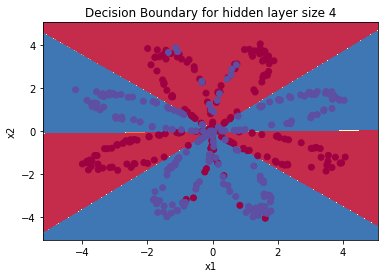

In [127]:
# Build a model with a n_h-dimensional hidden layer
parameters, costs = nn_model(X, Y, n_h = 4, num_iterations = 10000)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

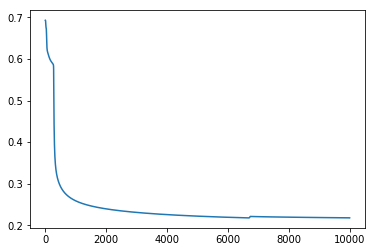

In [128]:
plt.plot(costs)

In [129]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


<class 'dict'>
Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.636665
Cost after iteration 2000: 0.634775
Cost after iteration 3000: 0.633825
Cost after iteration 4000: 0.633212
Accuracy for 1 hidden units: 67.5 %
<class 'dict'>
Cost after iteration 0: 0.693159
Cost after iteration 1000: 0.582332
Cost after iteration 2000: 0.578951
Cost after iteration 3000: 0.577293
Cost after iteration 4000: 0.576191
Accuracy for 2 hidden units: 67.25 %
<class 'dict'>
Cost after iteration 0: 0.693170
Cost after iteration 1000: 0.286176
Cost after iteration 2000: 0.273343
Cost after iteration 3000: 0.266537
Cost after iteration 4000: 0.262182
Accuracy for 3 hidden units: 90.75 %
<class 'dict'>
Cost after iteration 0: 0.693162
Cost after iteration 1000: 0.258625
Cost after iteration 2000: 0.239334
Cost after iteration 3000: 0.230802
Cost after iteration 4000: 0.225528
Accuracy for 4 hidden units: 90.5 %
<class 'dict'>
Cost after iteration 0: 0.693082
Cost after iteration 1000: 0.253948
Co

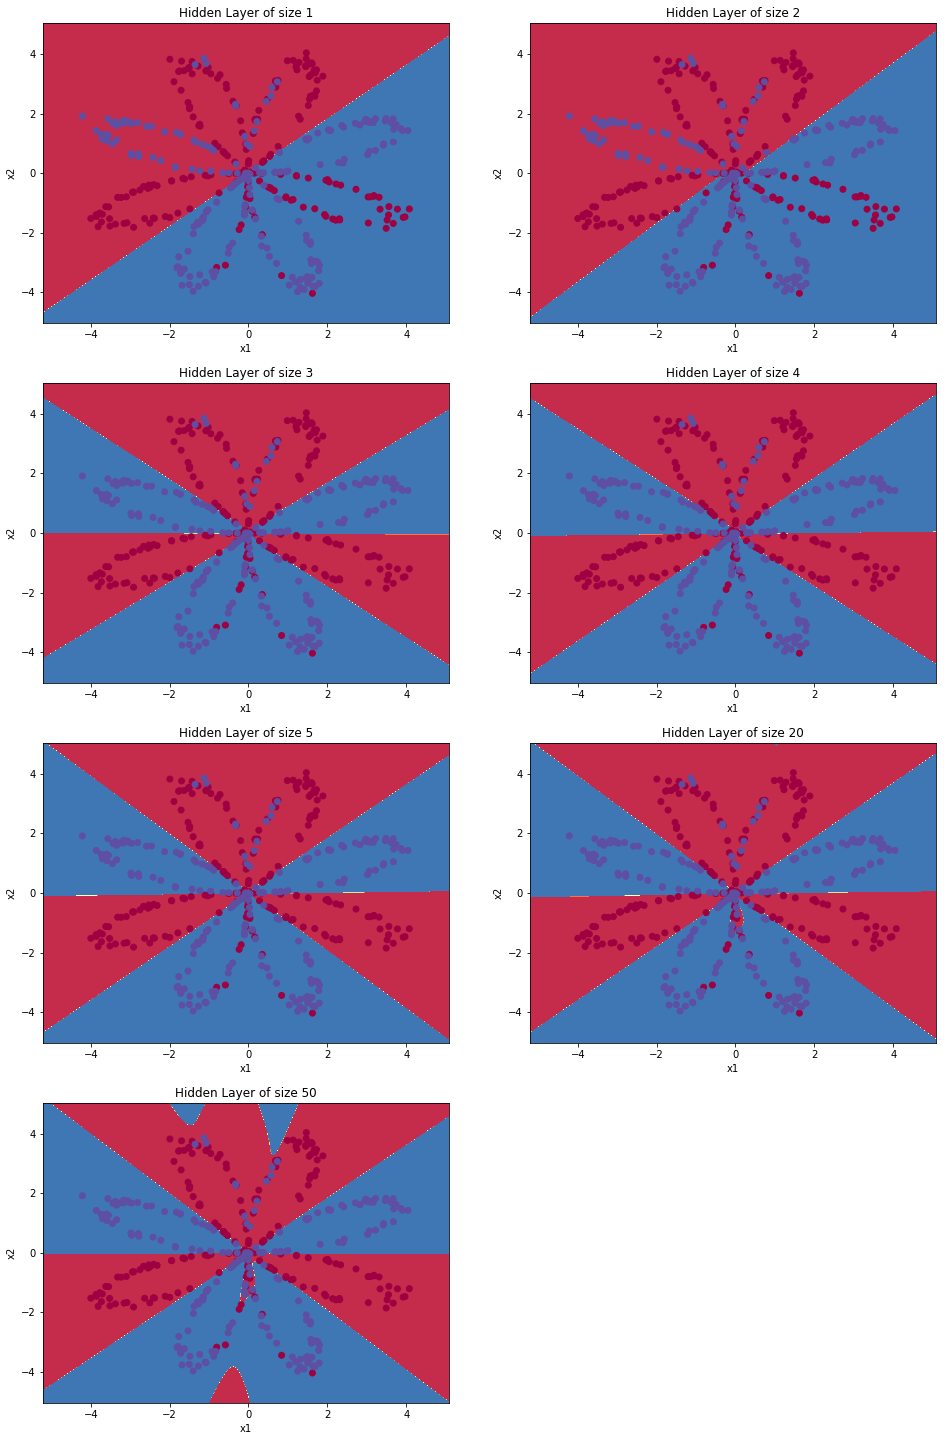

In [130]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters, costs = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))